# EDA Sentiment Analyses

In [2]:
! pip install nltk

In [4]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk.corpus as stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
import string
from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
punctuation = punctuation + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&o'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
#UCI ML drug dataset

#Importing the datasets and libraries

df_train = pd.read_csv("/content/sample_data/drugsComTest_raw.csv")
df_test = pd.read_csv("/content/sample_data/drugsComTrain_raw.csv")

print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

df_train.head() #printing the first 5 rows of the train set

The shape of the train set given is :  (53766, 7)
The shape of the test set given is :  (161297, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [8]:
# Data types
print(df_train.dtypes)  # data types of each column in the dataset

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object


In [9]:
#Merging the test and train data
merge = [df_train, df_test]
df_data = pd.concat(merge)

print (df_data.shape)

df_data.head(10)

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [10]:
df_data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [11]:
# Null values
print ("Null values in the dataset : ", df_data.isnull().sum(axis = 0))

Null values in the dataset :  uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


In [12]:
df_data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [13]:
# Calculating what percentage of data is null

size = df_data.shape[0]

print("Total Size of the dataset : ", size)

total_na = df_data.isnull().sum(axis=0)['condition']
print("Null values", total_na)

print("Percentage of null values : ", (total_na/size)*100)

Total Size of the dataset :  215063
Null values 1194
Percentage of null values :  0.5551861547546533


In [14]:
# Dropping the data points with null values as it's very much less than 5% of the total data points and also the data is not time series data
# so we can drop the data points with null values without any problem
df_data  = df_data.dropna(how='any',axis=0)
print("The shape of the data after dropping the null values is : ",df_data.shape) # printing the shape of the data after dropping the null values

The shape of the data after dropping the null values is :  (213869, 7)


In [15]:
# lowercasing the column names so it will be easier to work with them
df_data.columns = df_data.columns.str.lower()

In [16]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount'],
      dtype='object')

In [17]:
# Sorting the dataframe by uniqueID
df_data = df_data.sort_values(by=['uniqueid'])
df_data.reset_index(inplace=True, drop=True)
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [18]:
# Total unique conditions in the dataset
print(df_data['condition'].nunique(), "\n")
print("some of the conditions are: \n", df_data['condition'].unique()[0:10], "\n")

916 

some of the conditions are: 
 ['Abnormal Uterine Bleeding' 'Amenorrhea' 'Birth Control' 'Endometriosis'
 'Endometrial Hyperplasia, Prophylaxis' 'Renal Cell Carcinoma'
 'Not Listed / Othe' 'Eye Redness' 'Benign Prostatic Hyperplasia' 'Acne'] 



In [19]:
# top 10 drugs with rating equals 1
df_data[df_data['rating']==1]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

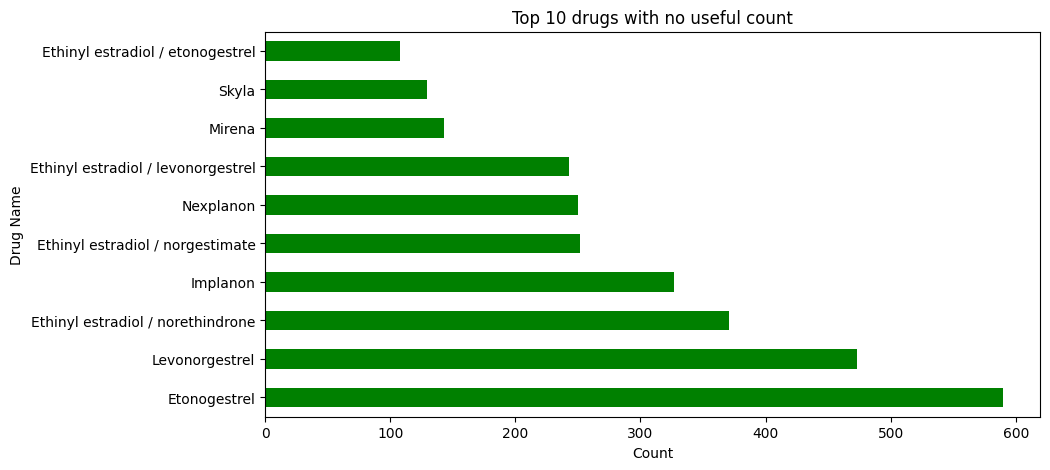

In [20]:
df_data.loc[df_data.usefulcount==0, 'drugname'].value_counts()[:10].plot(kind='barh', figsize=(10,5), color='green')
plt.title('Top 10 drugs with no useful count')
plt.xlabel('Count')
plt.ylabel('Drug Name')
plt.show()

In [21]:
# minimum rating in the dataset
min_rating = min(df_data['rating'])
print(min_rating)

1


In [22]:
# Converting the date in to date time format
df_data['date'] = pd.to_datetime(df_data['date'])

# Exploratory Data Analysis

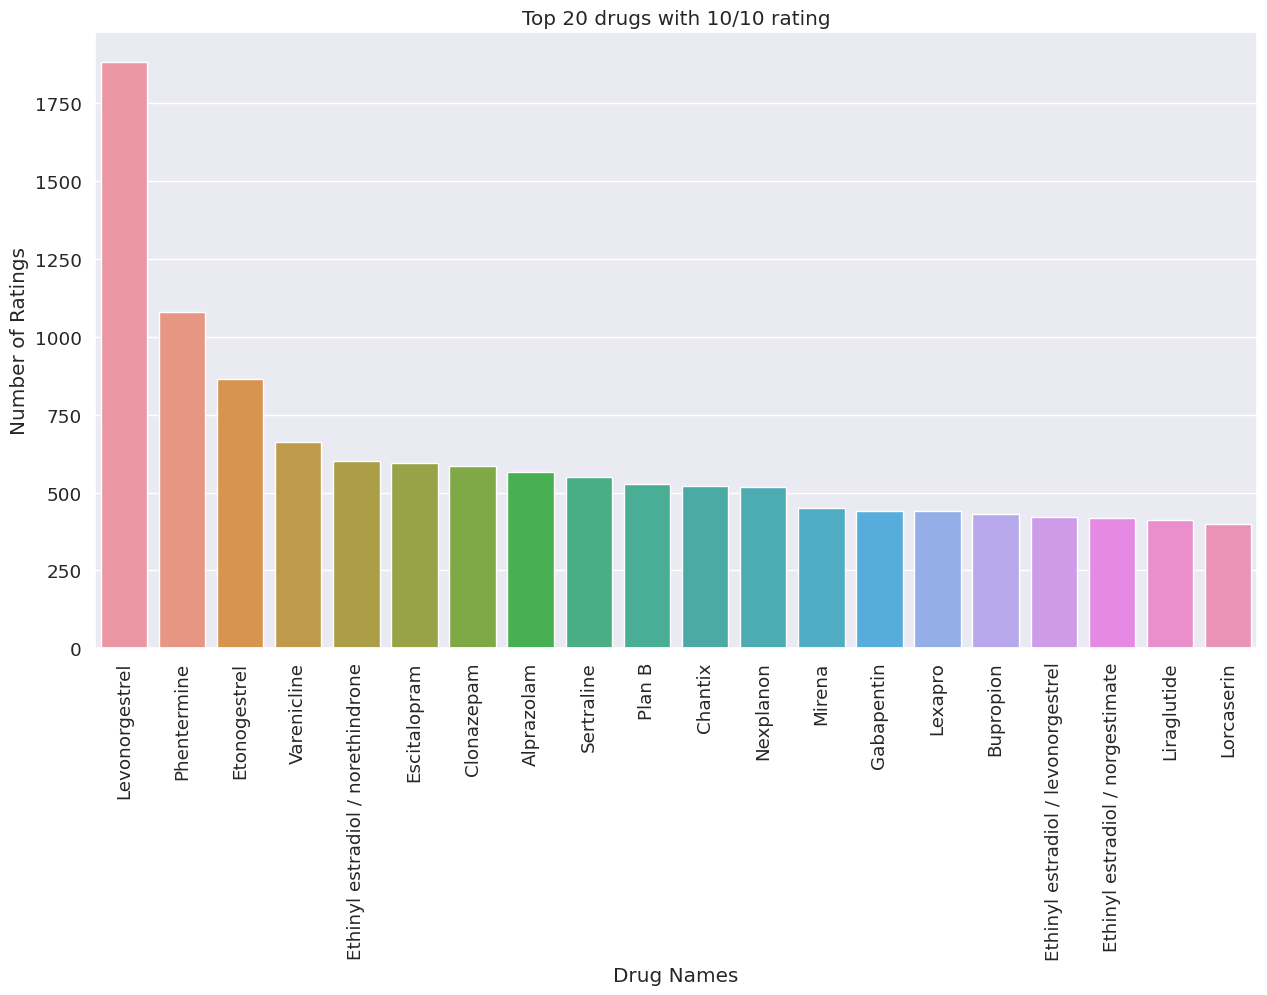

In [23]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameters
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set(title = 'Top 20 drugs with 10/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90); # Rotating the x-axis labels to 90 degrees

Text(0.5, 0, 'Drug name')

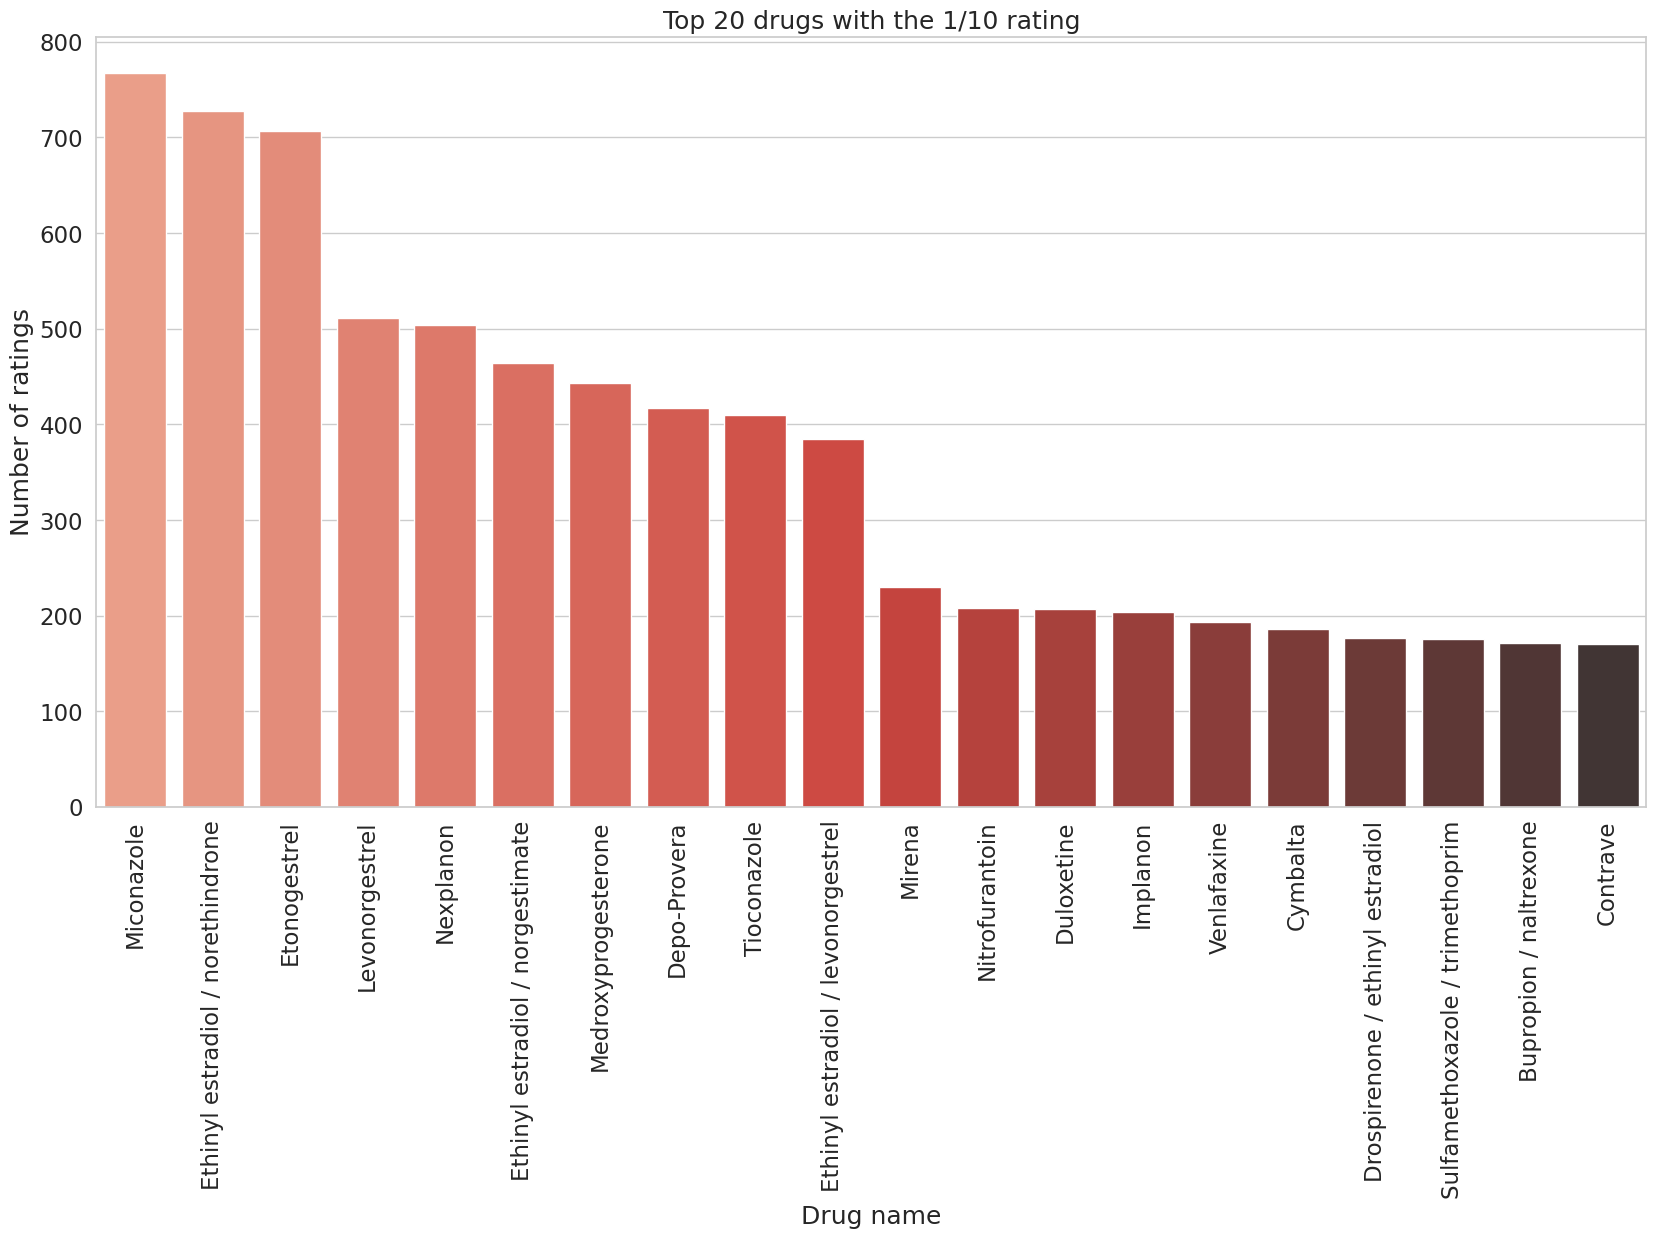

In [24]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# setting parameter
sns.set(font_scale=1.5, style="whitegrid")
plt.rcParams['figure.figsize'] = (20, 10)

rating = dict(df_data.loc[df_data.rating==1, 'drugname'].value_counts())

drugname = list(rating.keys())

sns_rating = sns.barplot(x=drugname[:20], y=list(rating.values())[:20], palette="Reds_d")
sns_rating.set_xticklabels(sns_rating.get_xticklabels(), rotation=90)
sns_rating.set_title("Top 20 drugs with the 1/10 rating")
sns_rating.set_ylabel("Number of ratings")
sns_rating.set_xlabel("Drug name")

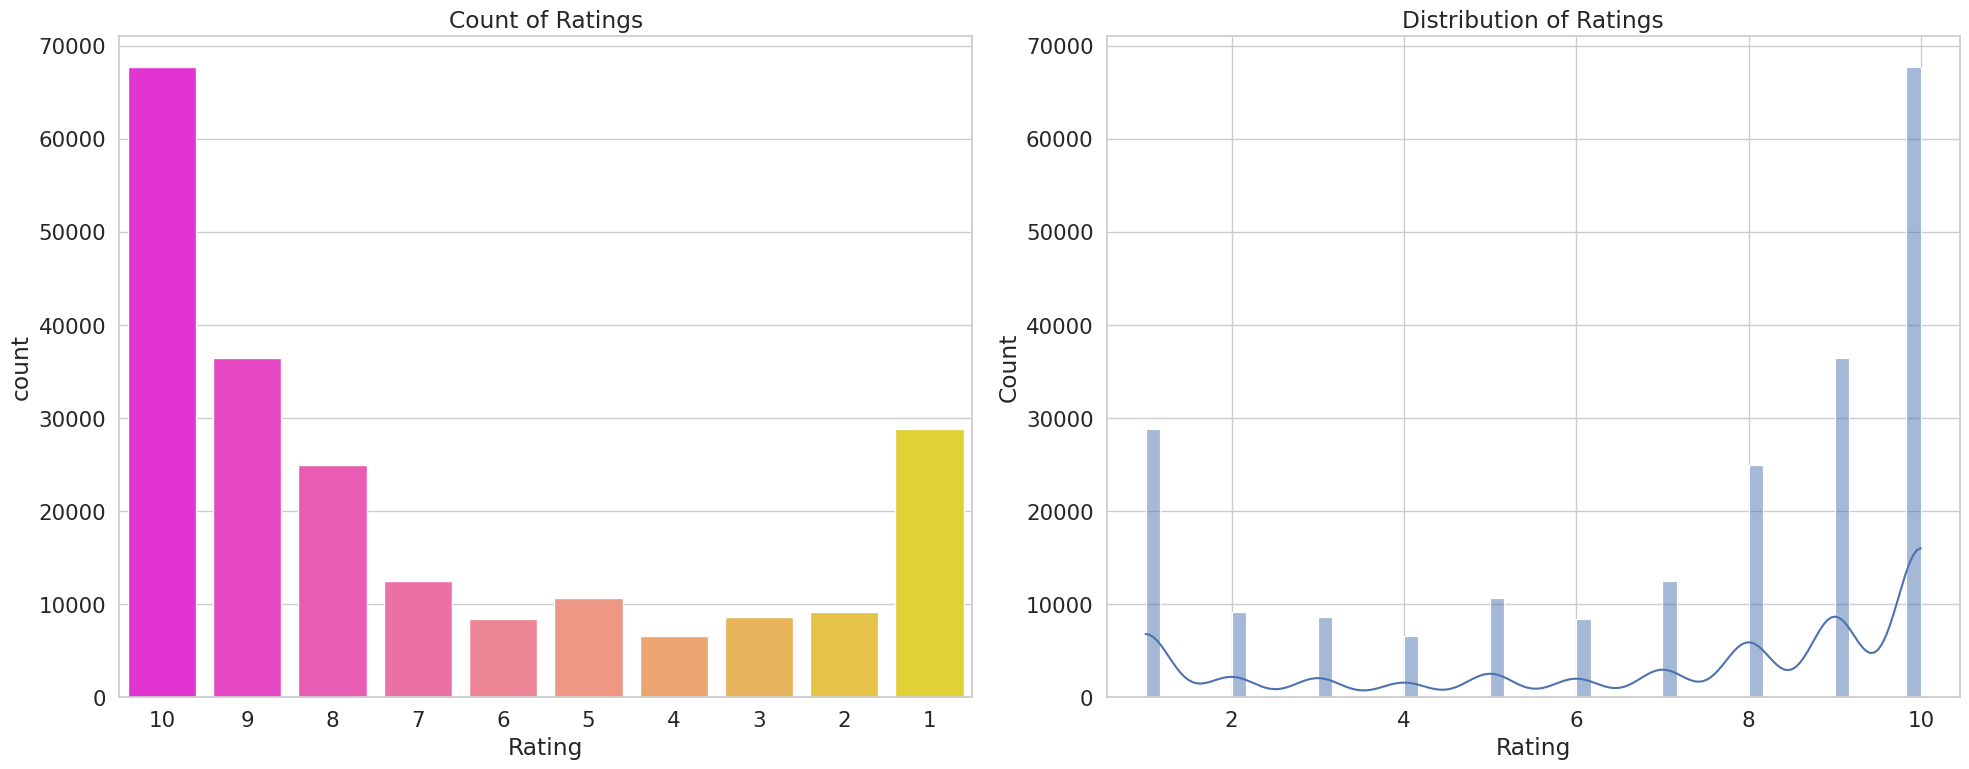

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



plt.rcParams['figure.figsize'] = [20, 8]
sns.set(font_scale=1.4, style='whitegrid')
fig, ax = plt.subplots(1, 2)

# Convert the 'rating' column to a numeric data
df_data['rating'] = pd.to_numeric(df_data['rating'], errors='coerce')

sns_1 = sns.countplot(data=df_data, x='rating', palette='spring', order=list(range(10, 0, -1)), ax=ax[0])
sns_2 = sns.histplot(data=df_data, x='rating', kde=True, ax=ax[1])  # Using histplot instead of distplot (deprecated)

sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

plt.tight_layout()
plt.show()


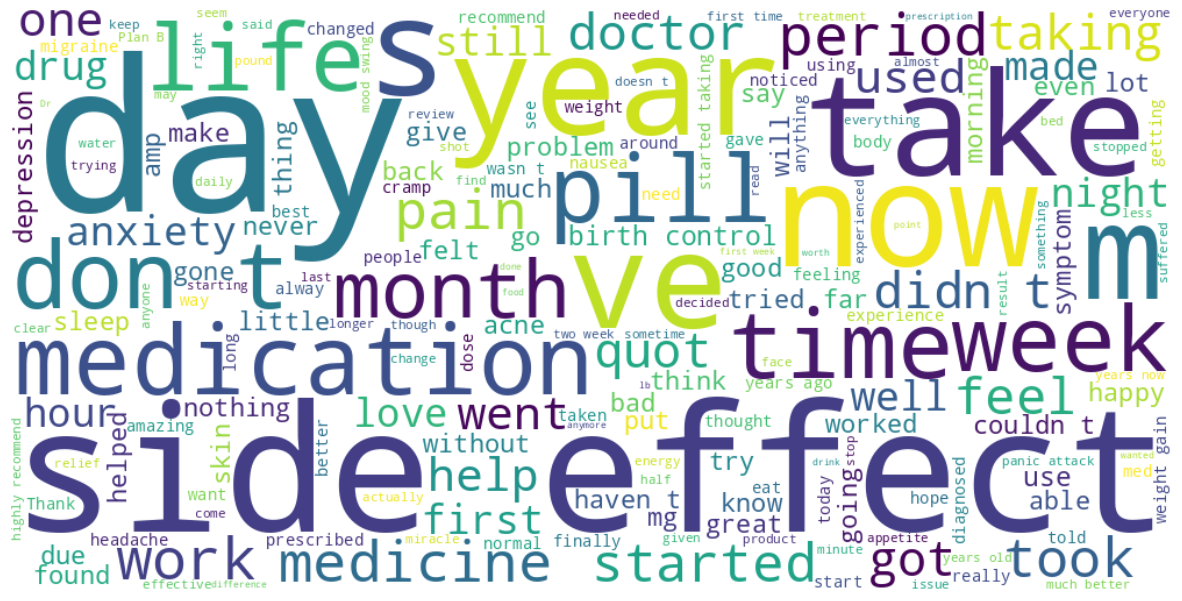

In [29]:
# word cloud of the reviews with rating equal to 10

df_rate_ten = df_data.loc[df_data['rating'] == 10, 'review'] # selecting the reviews with rating equal to 10
k = (' '.join(df_rate_ten)) # joining all the reviews into a single string
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(k) # creating the word cloud
plt.figure(figsize=(15,8)) # setting the figure size
plt.imshow(wordcloud, interpolation="bilinear") # displaying the word cloud
plt.axis("off"); # removing the axis

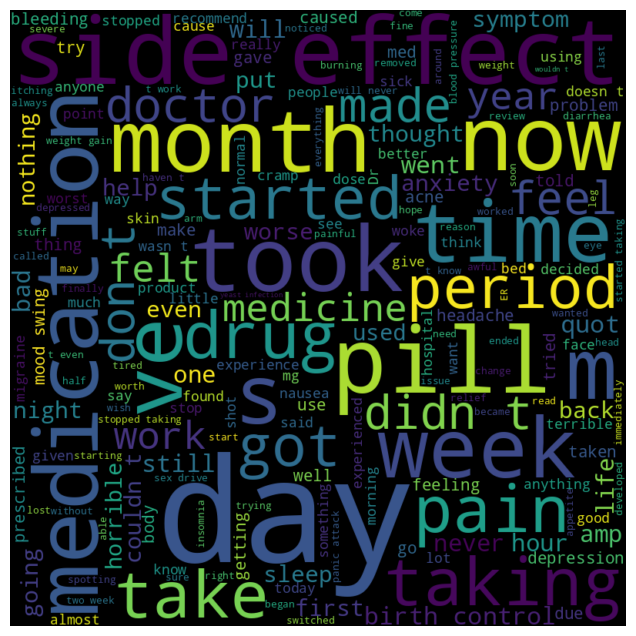

In [30]:
# Word cloud of the reviews with rating eqaul to 1
df_rate_one = df_data.loc[df_data.rating ==1, 'review']
k1 = ' '.join(df_rate_one)
wordcloud = WordCloud(width = 800, height = 800,).generate(k1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

Text(0.5, 1.0, 'Mean Rating of the Drugs per Year')

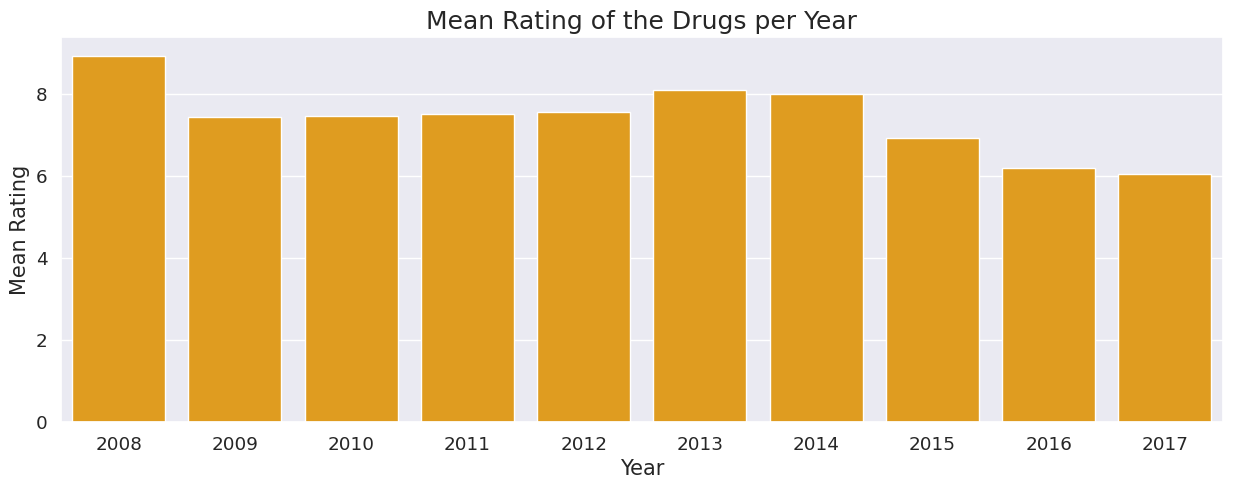

In [31]:
# This barplot shows the mean rating of the drugs per year
# The mean rating of the drugs is calculated by taking the mean of the rating of the drugs per year

mean_rating = dict(df_data.groupby(df_data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = (15, 5)
sns.set(font_scale = 1.2, style='darkgrid')
sns= sns.barplot(x=list(mean_rating.keys()), y=list(mean_rating.values()), color='orange')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean Rating', fontsize=15)
plt.title('Mean Rating of the Drugs per Year', fontsize=18)

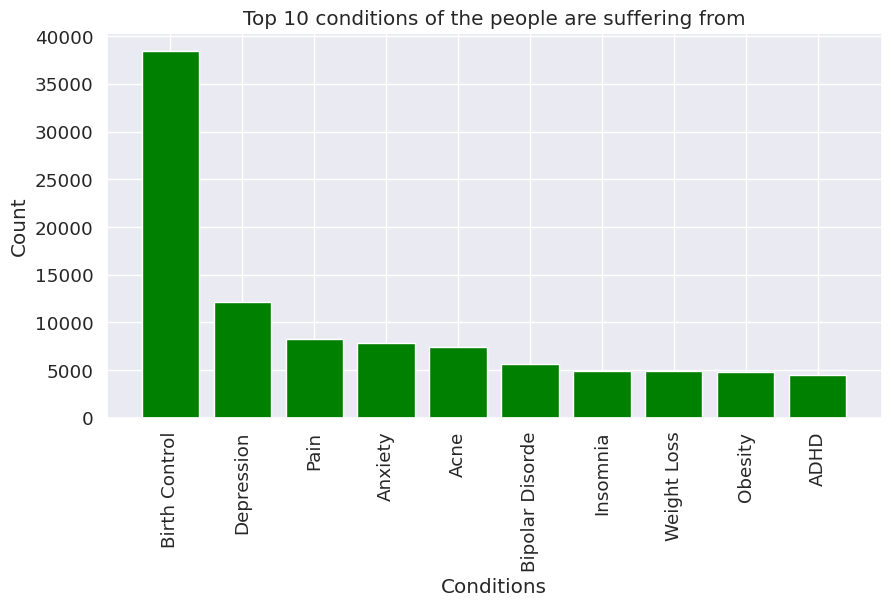

In [32]:
# This barplot show the Top 10 conditions of the people are suffering from.

cond=dict(df_data['condition'].value_counts()) # dict of conditions and their count
cond=dict(sorted(cond.items(), key=lambda x: x[1], reverse=True)) # sorting the dict in descending order
cond=dict(list(cond.items())[0:10]) # slicing the dict to get top 10 conditions
plt.figure(figsize=(10,5))
plt.bar(cond.keys(),cond.values(),color='green')
plt.xticks(rotation=90)
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.title('Top 10 conditions of the people are suffering from')
plt.show()


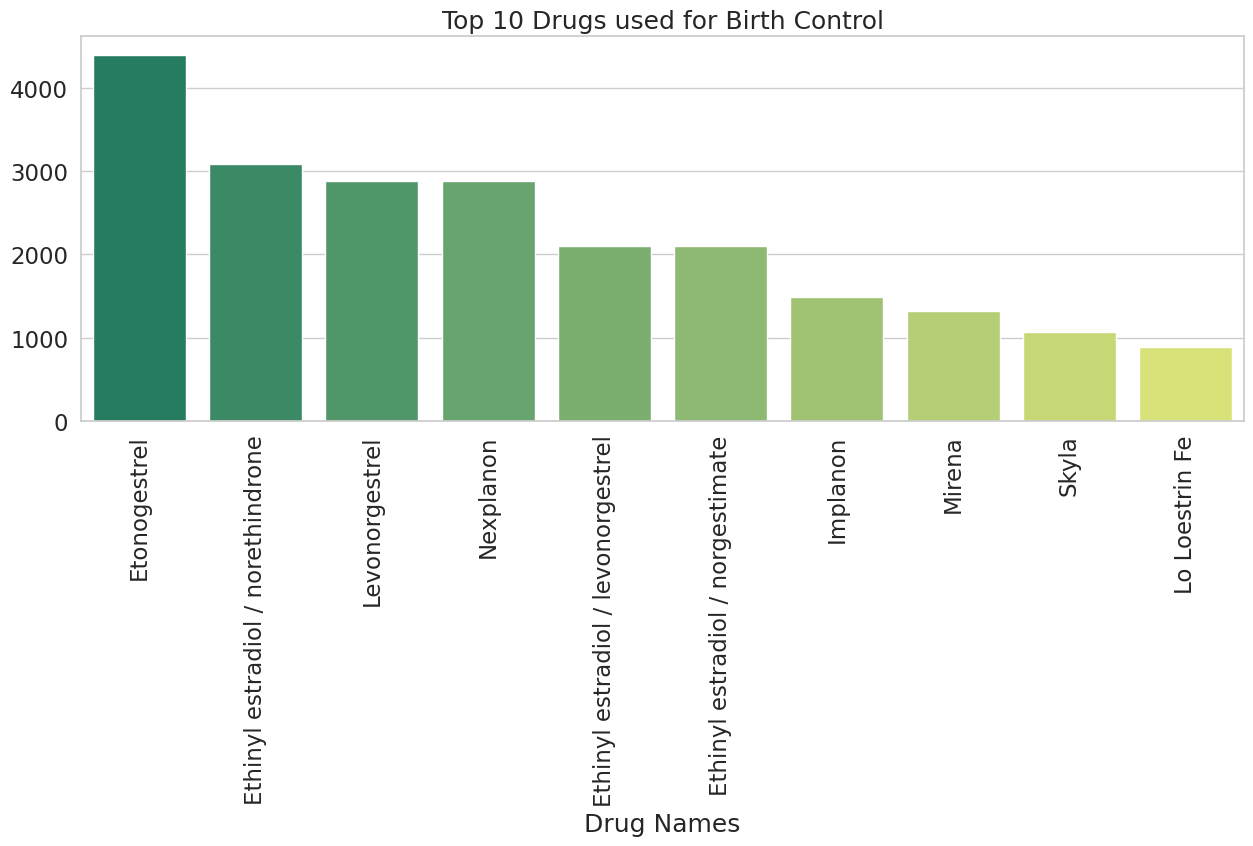

In [33]:
# Top 10 drugs which are used for the Top condition, that is Birth Control
# Top 10 drugs which are used for the top condition, that is Birth Control
import seaborn as sns

df = df_data[df_data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.5, style = 'whitegrid')
sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<Axes: xlabel='usefulcount', ylabel='Density'>

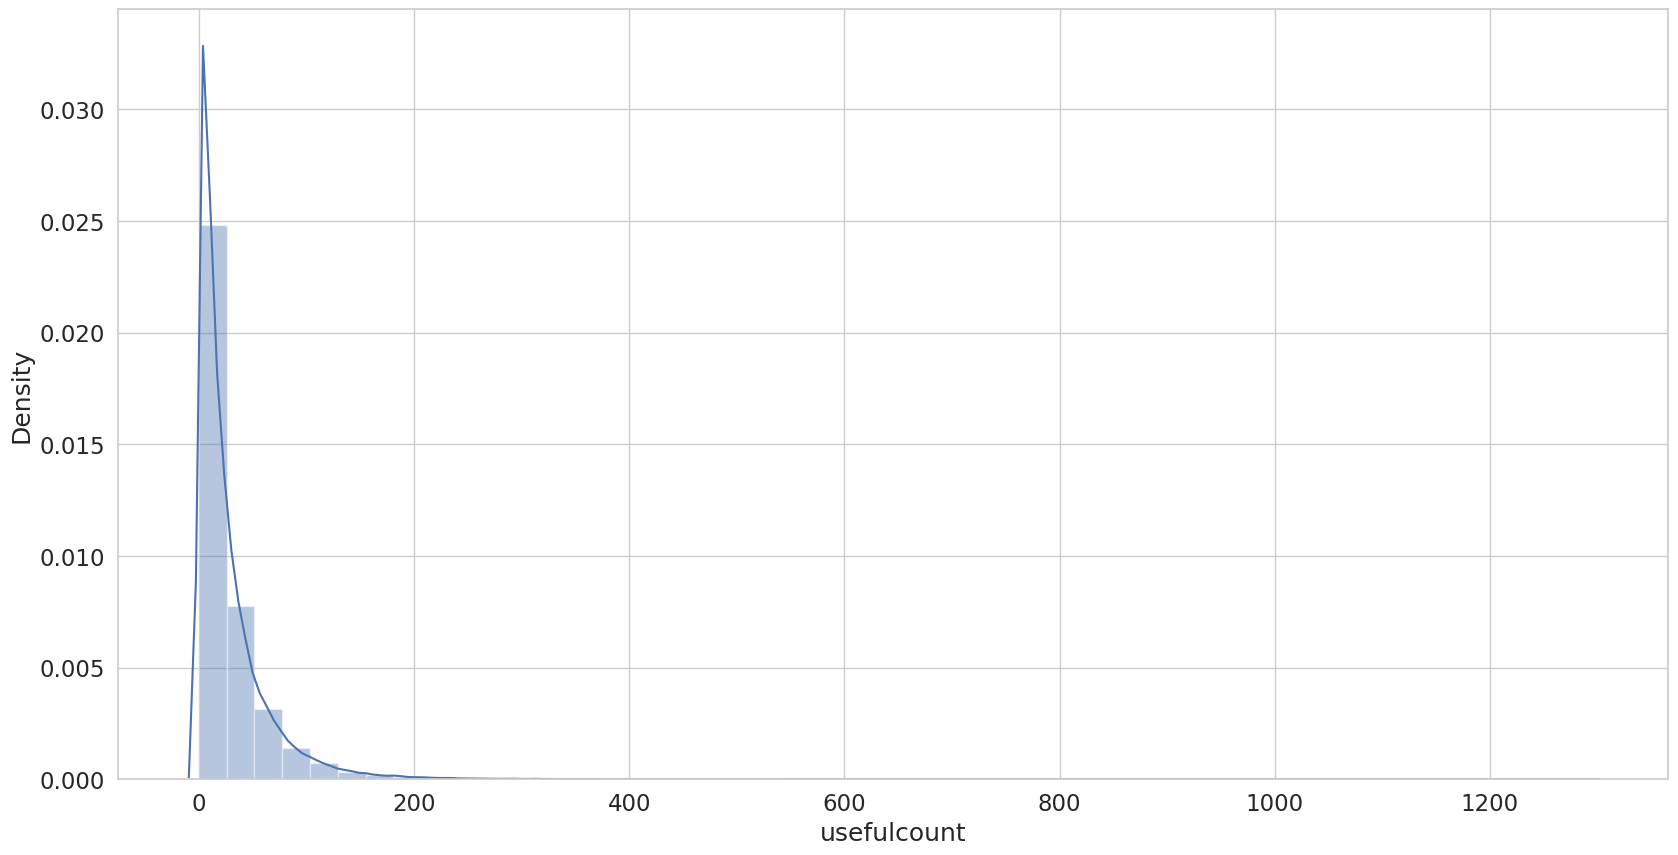

In [34]:
# Distribution of the useful count
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
plt.rcParams['figure.figsize'] = [20, 10]
sns.distplot(df_data['usefulcount'].dropna())

In [35]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount'],
      dtype='object')

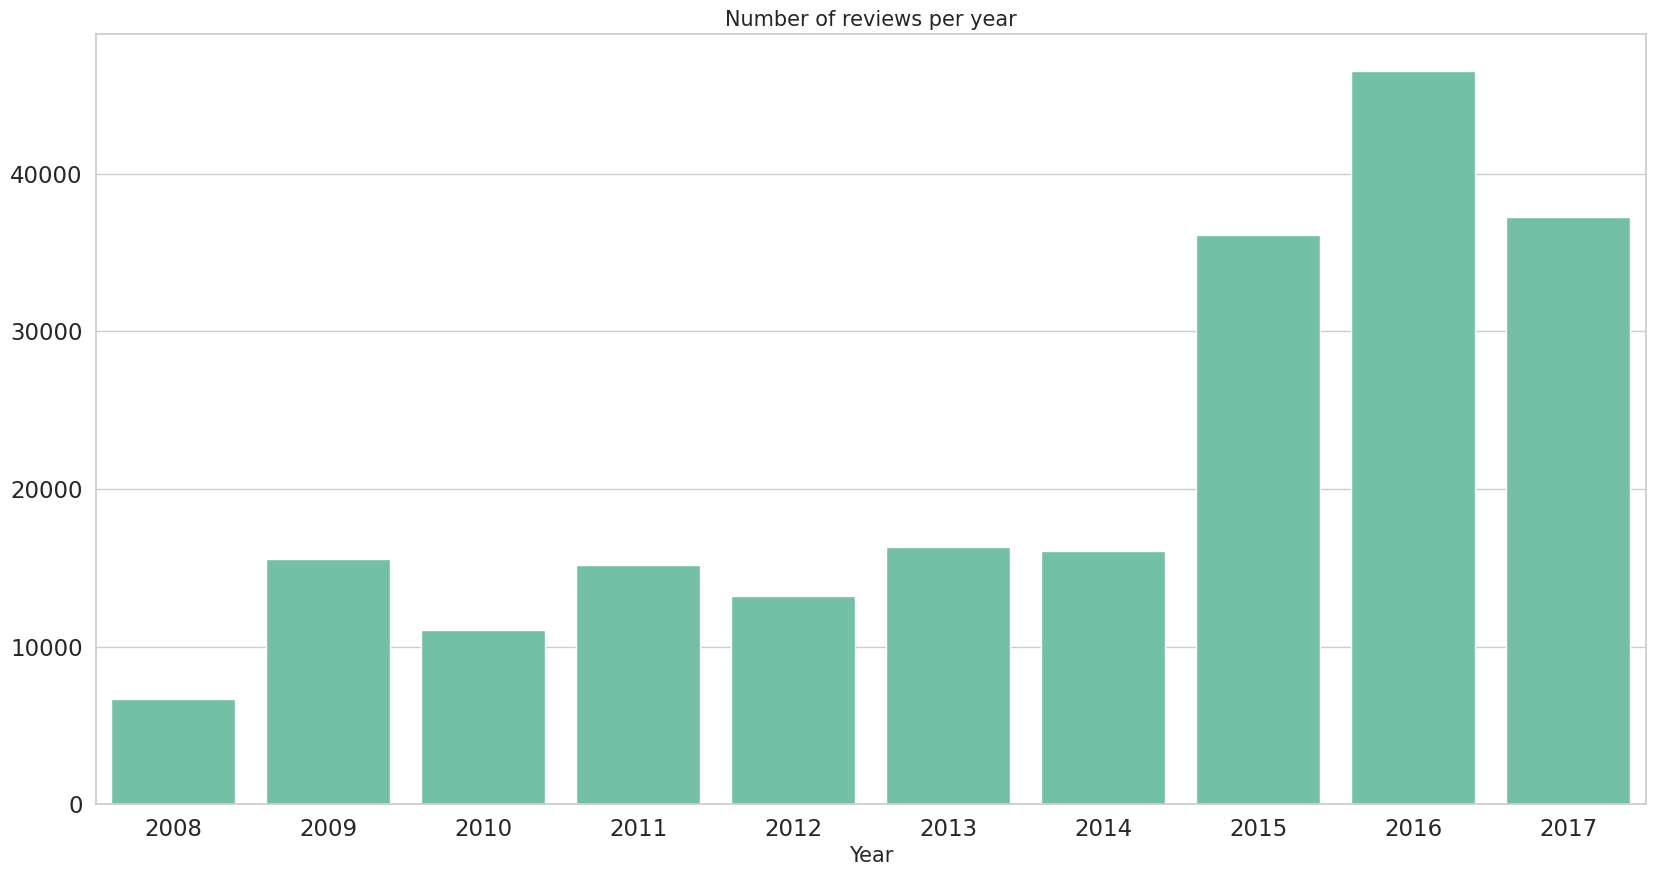

In [36]:
# This barplot shows the number of reviews per year
df_bar = df_data['date'].dt.year.value_counts()
df_bar = df_bar.sort_index()
sns_=sns.barplot(x= df_bar.index, y=df_bar.values,  color='mediumaquamarine')
sns_.set_title('Number of reviews per year', fontsize=15)
sns_.set_xlabel('Year', fontsize=15);

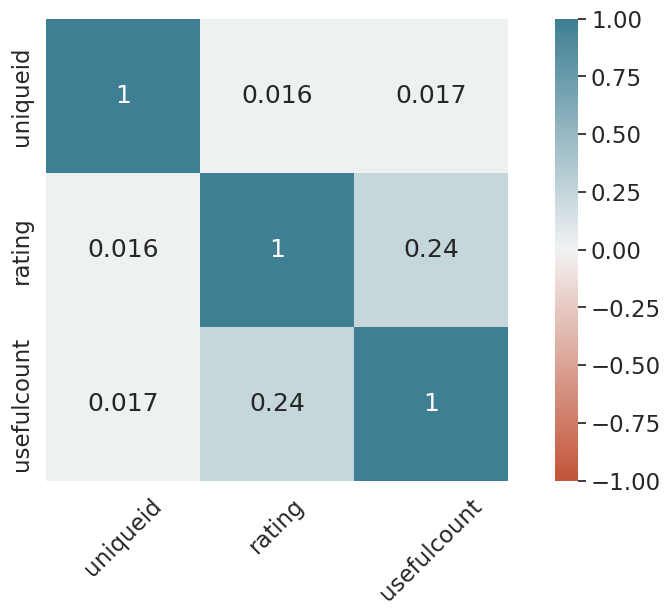

In [37]:
# Heatmap of the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 6) # set the figure size
corr = df_data.select_dtypes(include = ['float64', 'int64']).corr() # select the numerical columns
sns_heat=sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True);  # plot the heatmap
plt.setp(sns_heat.get_xticklabels(), rotation=45); # rotate the x-axis labels to 45 degrees

# Unigrams

In [42]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

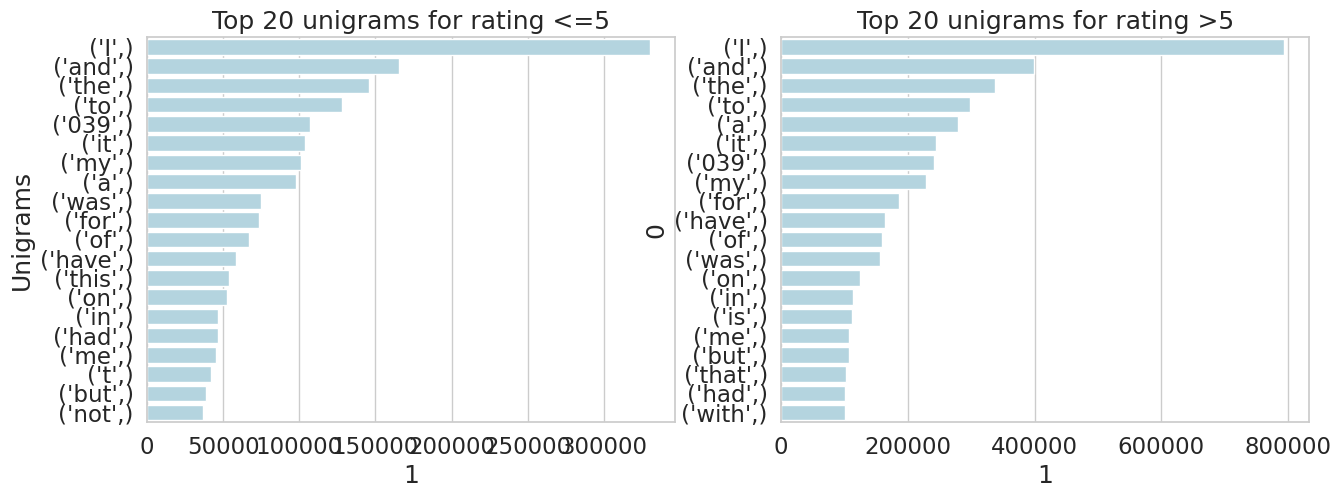

In [43]:
# Top 20 unigrams according to the rating
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_ = df_data[['rating', 'review']]
df_['reveiew']= df_data['review'].str.replace("&#039;", "")
df_['review']= df_['review'].str.replace(r'[^\w\d\s]',' ')

df_review_5 = " ".join(df_.loc[df_.rating<=5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating>5, 'review'])

token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

unigram_5 = ngrams(token_review_5, 1)
unigram_10 = ngrams(token_review_10, 1)

frequency_5 = Counter(unigram_5)
frequency_10 = Counter(unigram_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot for top 20 unigrams for rating  <=5

plt.rcParams['figure.figsize'] = (15, 5)
fig, ax = plt.subplots(1, 2)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_5=sns.barplot(x=df_5[1], y=df_5[0], color='lightblue', ax=ax[0])
sns_10=sns.barplot(x=df_10[1], y=df_10[0], color='lightblue', ax=ax[1])

# Setting axes labels
sns_5.set_title('Top 20 unigrams for rating <=5')
sns_10.set_title('Top 20 unigrams for rating >5')
sns_5.set_ylabel('Unigrams');


In [ ]:
# # Top 20 bigrams according to the rating
# from wordcloud import WordCloud
# from nltk import ngrams
# from collections import Counter
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# from textblob import TextBlob
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import nltk
# import re
# import string
# import warnings
# warnings.filterwarnings("ignore")
# from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer
# from nltk.stem import SnowballStemmer


# # Top 20 unigrams according to the rating
# df_ = df_data[['rating', 'review']]
# df_['review'] = df_data['review'].str.replace("&#039;", "")
# df_['review'] = df_['review'].str.replace(r'[^\w\d\s]',' ')

# df_review_5 = " ".join(df_.loc[df_.rating <= 5, 'review'])
# df_review_10 = " ".join(df_.loc[df_.rating > 5, 'review'])

# token_review_5 = word_tokenize(df_review_5)
# token_review_10 = word_tokenize(df_review_10)

# token_review_10 = word_tokenize(df_review_10)
# token_review_5 = word_tokenize(df_review_5)


# bigrams_5 = ngrams(token_review_5, 2)
# bigrams_10 = ngrams(token_review_10, 2)

# frequency_5 = Counter(bigrams_5)
# frequency_10 = Counter(bigrams_10)

# df_5 = pd.DataFrame(frequency_5.most_common(20))
# df_10 = pd.DataFrame(frequency_10.most_common(20))

# # Barplot that shows the top 20 bigrams
# plt.rcParams['figure.figsize'] = [22,11]
# fig, ax = plt.subplots(1,2)
# sns.set(font_scale = 1.3, style = 'whitegrid')

# sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'red', ax = ax[0])
# sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'red', ax = ax[1])

# # Setting axes labels
# sns_5.set_title("Top 20 bigrams according for rating <= 5")
# sns_10.set_title("Top 20 bigrams according for rating > 5")
# sns_5.set_ylabel("bigrams");


# Preprocessing

In [ ]:
# We are going to use the threshold rating of 5 for giving the sentiment.
# The review will have a positive sentiment (1) if rating>5 and negative sentiment otherwise.
